# Data Star Graph Theory
## Sample Worksheet

In [1]:
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import operator

%matplotlib inline

## Datasets

Publicly available datasets for networks can be found with http://www-personal.umich.edu/~mejn/netdata/ and https://snap.stanford.edu/data/ .

## Tree graph

In [2]:
random.seed(1)
G2 = nx.barabasi_albert_graph(80, 1)
nx.write_gml(G2, 'Scale_free.gml')

Using Gephi, with the file 'Scale_free.gml' as input, the visualization of this scale-free tree graph is constructed:

<img src='Scale_free.png'>

## Directed Graph

The following data set is taken from the Stanford Network Analysis Project, for data on Wikipedia vote network https://snap.stanford.edu/data/wiki-Vote.html . This is a directed graph, so you should use DiGraph. You can explore other open graph data sets on the website https://snap.stanford.edu/data/ .

In [3]:
G_di = nx.read_edgelist('wiki-Vote.txt', create_using=nx.DiGraph())
print('The directed graph has ', len(G_di), " nodes and ", len(G_di.edges()), " edges.")

The directed graph has  7115  nodes and  103689  edges.


The output of sorted is in descending order of second item of each tuple. Each tuple consists of first element the name of the node, and the second element the in-degree.

In [4]:
sorted(G_di.in_degree(), key=operator.itemgetter(1), reverse=True)[0:5]

[('4037', 457), ('15', 361), ('2398', 340), ('2625', 331), ('1297', 309)]

The second element of each tuple is the out-degree.

In [5]:
sorted(G_di.out_degree(), key=operator.itemgetter(1), reverse=True)[0:5]

[('2565', 893), ('766', 773), ('11', 743), ('457', 732), ('2688', 618)]

Since the graph is too large for visualization in NetworkX, we will work with a smaller graph. First, the top 20 nodes (according to in-degree) is obtained.

In [6]:
top_20_in = [n[0] for n in sorted(G_di.in_degree(), key=operator.itemgetter(1), reverse=True)[0:20]]

The subgraph corresponding to these 20 nodes are obtained.

In [7]:
G_di = G_di.subgraph(top_20_in)

Only 116 edges remain.

In [8]:
len(G_di.edges())

116

The Kamada--Kawai algorithm is used to layout for visualization.

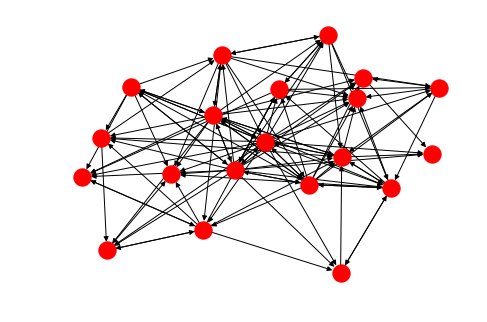

In [9]:
nx.draw_kamada_kawai(G_di)

## Bipartite Graph

A bipartite graph, consisting of actor(esse)s and their movies, is obtained from http://konect.uni-koblenz.de/downloads/tsv/dbpedia-starring.tar.bz2 . The following custom code reads from the downloaded file.

In [10]:
G_bi = nx.Graph()
with open('dbpedia-starring/out.dbpedia-starring', 'r') as file:
    count, count_out, count_in, count_edge = 0, 0, 0, 0
    for line in file:
        if count < 2:
            count += 1
            continue
        elements = line.split(' ')
        e_out = 'o' + str(elements[0])
        e_in = 'i' + str(elements[1])
        if e_out not in G_bi.nodes():
            G_bi.add_node(e_out)
            count_out += 1
        if e_in not in G_bi.nodes():
            G_bi.add_node(e_in)
            count_in += 1
        G_bi.add_edge(e_out, e_in)
        count_edge += 1
        count += 1

Here, we separate out the movies from the actors.

In [11]:
in_nodes = [ node for node in G_bi.nodes() if node[0] == 'i']
out_nodes = [ node for node in G_bi.nodes() if node[0] == 'o']

The 5 largest movies (most actors).

In [12]:
sorted(G_bi.degree(in_nodes), key=operator.itemgetter(1), reverse=True)[0:5]

[('i19492', 321),
 ('i1040', 280),
 ('i8695', 229),
 ('i4727', 222),
 ('i625', 216)]

The 5 most prolific actors (most movies starred).

In [13]:
sorted(G_bi.degree(out_nodes), key=operator.itemgetter(1), reverse=True)[0:5]

[('o42171', 65), ('o62525', 51), ('o53870', 48), ('o65868', 46), ('o5575', 41)]

## Weighted Networks

The data is from http://vlado.fmf.uni-lj.si/pub/networks/data/UciNet/UciData.htm, under section STOKMAN-ZIEGLER CORPORATE INTERLOCKS. It is regarding the corporate interlocks in the Netherlands, from a study concluded in 1976. The data set can be found here http://vlado.fmf.uni-lj.si/pub/networks/data/UciNet/szcid.dat . The matrix is copied and stored in a file "szcid.dat". (This is only feasible with small data.)

In [14]:
G_weight = nx.MultiGraph()
ar = np.empty((16, 16))
with open('szcid.dat', 'r') as file:
    count = 0
    for row in file:
        elements = [int(e) for e in row.split(' ')]
        ar[count] = elements
        count += 1

In [15]:
labels = ['ABN', 'AMRO', 'ENNIA', 'NS', \
'BUHRT', 'AGO', 'AKZO', 'NB', \
'SHV', 'FGH', 'HEINK', 'PHLPS', \
'NATND', 'OGEM', 'RSV', 'NSU']

In [16]:
for i in range(16):
    G_weight.add_node(labels[i])

In [17]:
for i in range(16):
    for j in range(16):
        if j>i and ar[i][j] != 0:
            G_weight.add_edge(labels[i], labels[j], weight=ar[i][j])

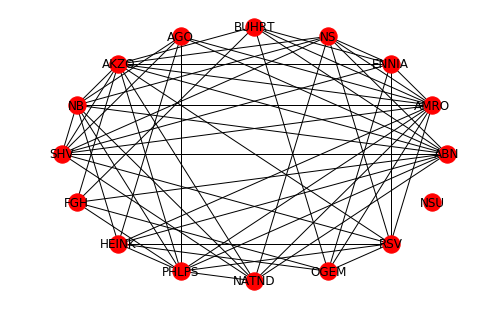

In [18]:
nx.draw_circular(G_weight, with_labels=True)

Text(0.5,1,'Stockman--Ziegler Corporate Interlocks (Netherlands data, 1976)')

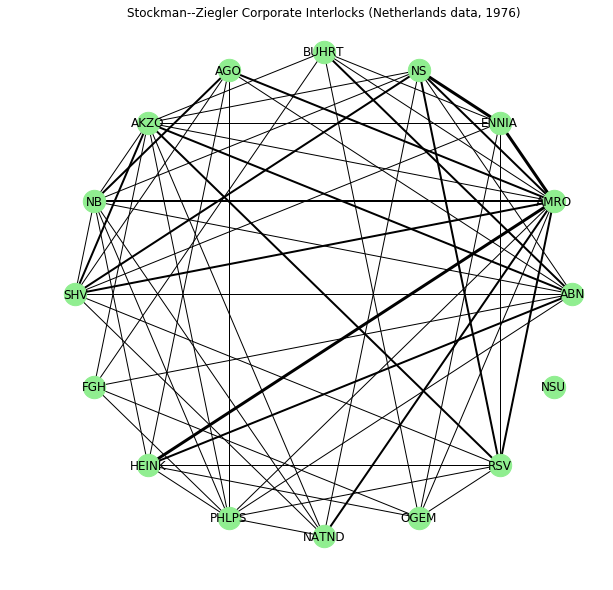

In [19]:
# Just an example given here. NetworkX and Python in general is not great in visualizing.
mpl.rcParams['figure.figsize'] = (10,10)
pos = nx.circular_layout(G_weight)
nx.draw_networkx_nodes(G_weight,pos,node_color='lightgreen',node_size=500)
nx.draw_networkx_labels(G_weight,pos,dict(zip(labels,labels)),font_size=12)
for weight in range(1,4):
    edges = [(node1,node2) for (node1,node2,edge_attr) in G_weight.edges(data=True) if edge_attr['weight']==weight]
    width = weight
    nx.draw_networkx_edges(G_weight,pos,edgelist=edges,width=width)
plt.axis('off')
plt.title('Stockman--Ziegler Corporate Interlocks (Netherlands data, 1976)')